<a href="https://colab.research.google.com/github/AslanDevbrat/Geoinformatics/blob/main/Geo_assig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/Geoinformatics/Lab/Data.zip


Archive:  /content/drive/MyDrive/Geoinformatics/Lab/Data.zip
  inflating: Bhopal_Mask.zip         
  inflating: LC08_L1TP_146044_20201226_20201226_01_RT.tar.gz  
  inflating: LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz  


In [2]:
!unzip /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz

Archive:  /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz or
        /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz.zip, and cannot find /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz.ZIP, period.


In [9]:
!mkdir L7
!tar -xvf  /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz -C /content/L7

mkdir: cannot create directory ‘L7’: File exists
LE07_L1TP_145044_20021210_20170127_01_T1_ANG.txt
LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B2.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B3.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B4.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B5.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B6_VCID_1.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B6_VCID_2.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B7.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B8.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_BQA.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_GCP.txt
LE07_L1TP_145044_20021210_20170127_01_T1_MTL.txt
README.GTF


In [10]:
!mkdir L8
!tar -xvf  /content/LC08_L1TP_146044_20201226_20201226_01_RT.tar.gz -C /content/L8

LC08_L1TP_146044_20201226_20201226_01_RT_B1.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B2.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B3.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B4.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B5.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B6.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B7.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B8.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B9.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B10.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B11.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_BQA.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_ANG.txt
LC08_L1TP_146044_20201226_20201226_01_RT_MTL.txt


In [11]:
!unzip Bhopal_Mask.zip

Archive:  Bhopal_Mask.zip
   creating: Bhopal_Mask/
  inflating: Bhopal_Mask/Bhopal_Mask.cpg  
  inflating: Bhopal_Mask/Bhopal_Mask.dbf  
  inflating: Bhopal_Mask/Bhopal_Mask.prj  
  inflating: Bhopal_Mask/Bhopal_Mask.sbn  
  inflating: Bhopal_Mask/Bhopal_Mask.sbx  
  inflating: Bhopal_Mask/Bhopal_Mask.shp  
  inflating: Bhopal_Mask/Bhopal_Mask.shx  


In [12]:
!pip install elevation
!pip install richdem
!pip install pysheds
!pip install plantcv
!apt install imagemagick

     |████████████████████████████████| 71kB 3.2MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     |████████████████████████████████| 4.5MB 4.3MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 6.5MB 5.5MB/s 
     |████████████████████████████████| 19.1MB 238kB/s 
  Created wheel for pysheds: filename=pysheds-0.2.7-cp36-none-any.whl size=51838 sha256=4c72d8c1f8034d2d7df3bbb3248cfc8b30d5142c2054cf241dd98283b78b6706
  Stored in directory: /root/.cache/pip/wheels/e4/87/6f/f67cbfbc39ea2c76e0cb801c37590b9e3c47e9eee7baea2547
Successfully built pysheds
     |████████████████████████████████| 215kB 4.2MB/s 
     |████████████████████████████████| 48.6MB 88kB/s 
     |████████████████████████████████| 675kB 52.6MB/s 
     |████████████████████████████████| 102kB 12.2MB/s 
  C

In [13]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

## Working with Landsat 7 data

In [20]:
gdal_data = gdal.Open('/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF')
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

In [26]:
nodataval

In [43]:
data_array = gdal_data.ReadAsArray().astype(np.float)
np.amin(data_array)

0.0

In [31]:
# replace missing values if necessary
if np.any(data_array == 0):
    data_array[data_array == 0] = np.nan

In [34]:
np.unique(data_array)
len(np.unique(data_array))

14730028

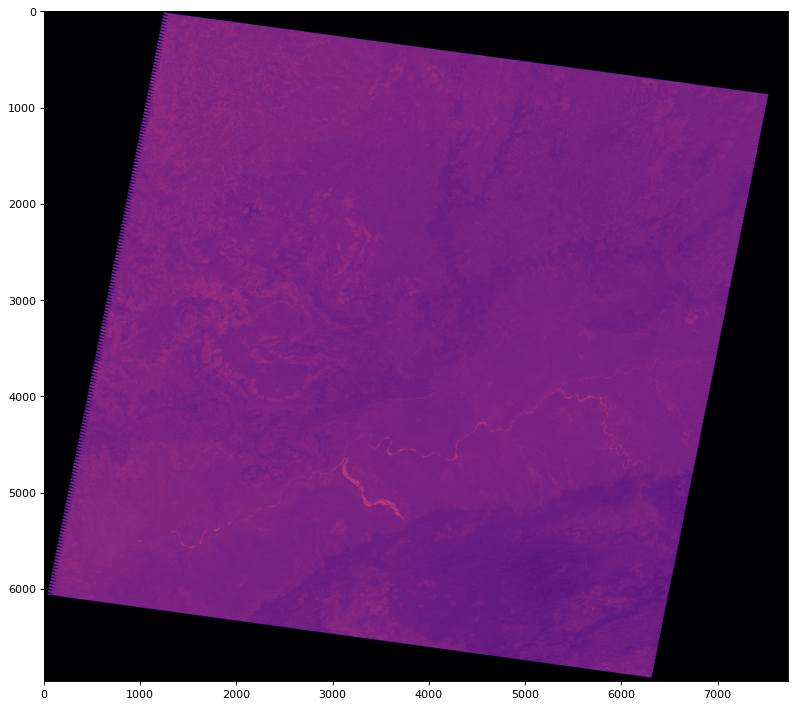

In [47]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(data_array,cmap='magma')

## DN to radiance

### Gain and Bias Method
 - L = (DN * G) + B

In [55]:
"""
"""

import pandas as pd
Landsat7_mlt_file = pd.read_csv('/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_MTL.txt',sep='=',names=['Property', 'Value'],header = None)
Landsat7_mlt_file.head(10)

,Property,Value
0,GROUP,L1_METADATA_FILE
1,GROUP,METADATA_FILE_INFO
2,ORIGIN,"""Image courtesy of the U.S. Geological Survey"""
3,REQUEST_ID,"""0501701260854_12305"""
4,LANDSAT_SCENE_ID,"""LE71450442002344SGS00"""
5,LANDSAT_PRODUCT_ID,"""LE07_L1TP_145044_20021210_20170127_01_T1"""
6,COLLECTION_NUMBER,01
7,FILE_DATE,2017-01-27T07:00:32Z
8,STATION_ID,"""SGS"""
9,PROCESSING_SOFTWARE_VERSION,"""LPGS_12.8.3"""
